# House Price Prediction in California, USA

**Predicting house prices can help to determine the selling price of a house of a particular region and can help people to find the right time to buy a home. In this article, I will introduce you to a machine learning project on house price prediction with Python.**

In [1]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [2]:
# Importing the dataset
dataset = pd.read_csv('../input/california-housing/California housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Linear Regression

In [3]:
# Information of the whole dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


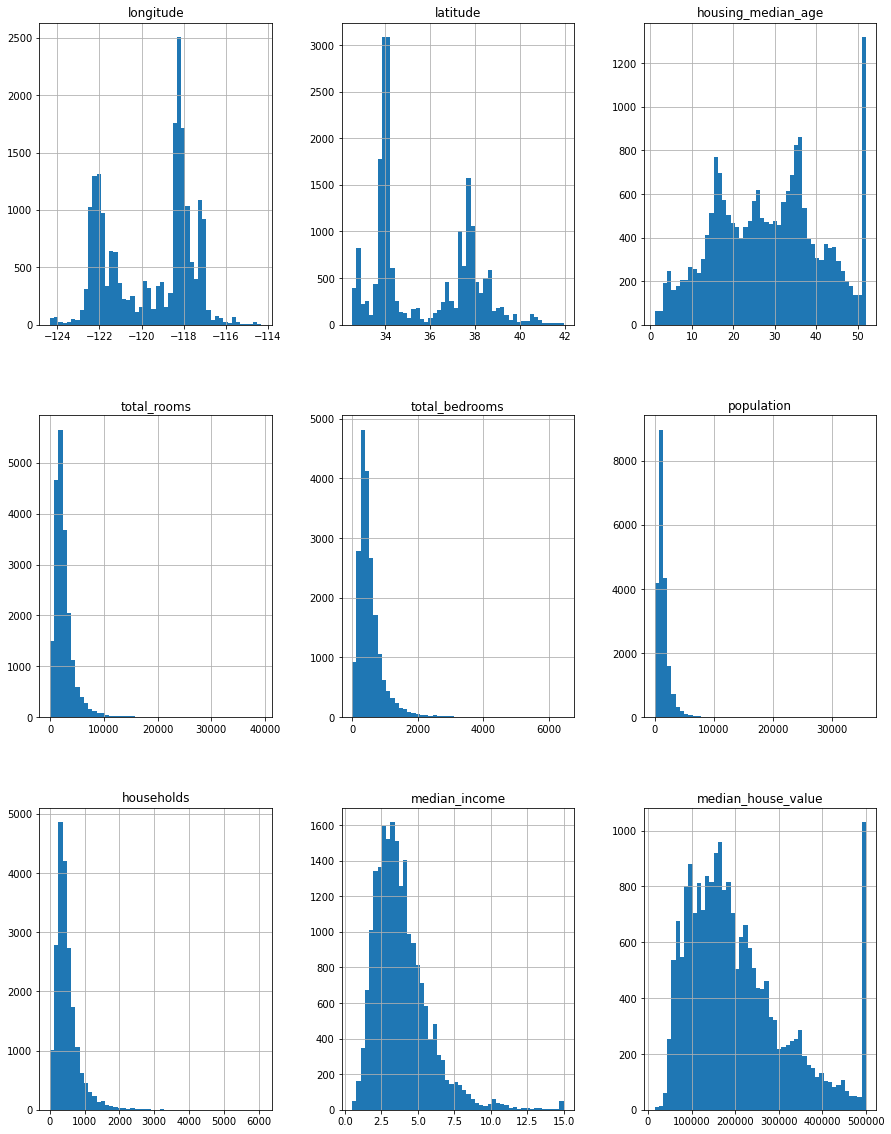

In [4]:
# Data Visualization on the the whole dataset
dataset.hist(bins = 50, figsize = (15,20))
plt.show()

In [5]:
# Missing values find out
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Total null values on the "total bedrooms" column
dataset[dataset['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
# Describing the whole dataset
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Data Preprocessing
dataset['total_rooms'].mean()
dataset['total_bedrooms'].median()
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median(), inplace = True)

In [9]:
# After caring Showing the null values
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# After caring the total null values on the "total bedrooms" column
dataset[dataset['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [11]:
# After caring the whole dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# Counting the "ocean proximity" 
counts = dataset['ocean_proximity'].value_counts()
counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
# Dealing with the "ocean proximity" column
enc = preprocessing.LabelEncoder()
dataset['ocean_proximity'] = enc.fit_transform(dataset['ocean_proximity'])
dataset['ocean_proximity'].value_counts
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [14]:
# Data selecion in the dataset
X = dataset.drop('median_house_value', axis=1).values
y = dataset['median_house_value'].values

In [15]:
# Data scaling on the 'X'
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X.std()

1.0

In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [17]:
# Training the Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# accuracy the regression
regressor.score(X_train, y_train)

0.6401079709888613

In [19]:
# Test set results
y_test

array([ 47700.,  45800., 500001., ..., 500001.,  72300., 151500.])

In [20]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 63642.8756283 , 154445.82484211, 252777.76132135, ...,
       439690.1127737 , 130408.05181885, 175513.56755484])

# K- Nearest Neighbors Regressor

In [21]:
# Creating K-Nearest Neighbors environment
params = {
    'n_neighbors': [9],  
    'weights': ['distance'],  
    'p': [1]   
    }
params

{'n_neighbors': [9], 'weights': ['distance'], 'p': [1]}

In [22]:
# Importing the K-NN model
knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [9], 'p': [1], 'weights': ['distance']},
             scoring='neg_mean_squared_error')

In [23]:
rs.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [24]:
# Importing the Time explorer module
knn = rs.best_estimator_
start = datetime.now()
start

datetime.datetime(2021, 4, 16, 3, 38, 34, 313783)

In [25]:
# Training the K-NN model on the Training set
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [26]:
# Predicting the K-NN model on the Test set
y_pred = knn.predict(X_test)
y_pred

array([ 51040.93799286,  66678.85967199, 411455.23416212, ...,
       455558.93491623,  73201.88495513, 184762.2797947 ])

In [27]:
# The amount of time spent
stop = datetime.now()
delta = stop - start
delta

datetime.timedelta(microseconds=612033)

In [28]:
# Accuracy of the K-NN model 
accuracy = r2_score(y_test, y_pred)
accuracy

0.7420932072260709

In [29]:
# Eerror detection on the K-NN model 
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

58134.6176387419

In [30]:
# Time compute of the K-NN Model
seconds = delta.seconds + delta.microseconds/1E6
seconds

0.612033

# Support Vector Regressor (SVR)

In [31]:
# Creating the support vector regressor environment
svr = SVR(C = 100, gamma = 1, kernel = 'linear')
svr

SVR(C=100, gamma=1, kernel='linear')

In [32]:
# Importing the Time explorer module
start = datetime.now()
start

datetime.datetime(2021, 4, 16, 3, 38, 35, 720924)

In [33]:
# Training the SVR model on the Training set
svr.fit(X_train, y_train)

SVR(C=100, gamma=1, kernel='linear')

In [34]:
# Predicting the SVR model on the Test set
y_pred = svr.predict(X_test)
y_pred

array([ 68215.30096126, 142312.62977755, 237984.84612508, ...,
       419312.09997962, 133584.68994066, 162759.1365595 ])

In [35]:
# The amount of time spent
stop = datetime.now()
delta = stop - start
delta

datetime.timedelta(seconds=12, microseconds=966885)

In [36]:
# Accuracy of the SVR model 
accuracy = r2_score(y_test, y_pred)
accuracy

0.5858920661609106

In [37]:
# Eerror detection on the SVR model 
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

73664.83248223207

In [38]:
# Time compute of the SVR Model
seconds = delta.seconds + delta.microseconds/1E6
seconds

12.966885

# Decision Tree Regressor

In [39]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
# Creating Decision Tree Regressor model environment
params = {'max_depth': [7], 
          'max_features': ['auto', 'sqrt'], 
          'min_samples_leaf': [7],
          'min_samples_split': [0.1], 
          'criterion': ['mse'] 
         }
params

{'max_depth': [7],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [7],
 'min_samples_split': [0.1],
 'criterion': ['mse']}

In [41]:
# Importing the Decision Tree Regressor model
tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [7],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [7], 'min_samples_split': [0.1]},
             scoring='neg_mean_squared_error')

In [42]:
# In details Decision tree Regressor model
rs.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=7,
                      min_samples_split=0.1)

In [43]:
# Importing the Time explorer module
start = datetime.now()
start

datetime.datetime(2021, 4, 16, 3, 38, 50, 213006)

In [44]:
# Training the Decision Tree Regression model on the Training set
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
# Predicting the Decision Tree Regression model on the Test set
y_pred = tree.predict(X_test)
y_pred

array([ 42500.,  52900., 500000., ..., 500001.,  68000., 159600.])

In [46]:
# The amount of time spent
stop = datetime.now()
delta = stop - start
delta

datetime.timedelta(microseconds=564145)

In [47]:
# Accuracy of the Decision tree regression model 
accuracy = r2_score(y_test, y_pred)
accuracy

0.6541276554383006

In [48]:
# Eerror detection on the Decision tree regression model 
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

67322.6726771064

In [49]:
# Time compute of the Decision tree regression Model
seconds = delta.seconds + delta.microseconds/1E6
seconds

0.564145

**Gladly, I think you were enjoying this project. Thanksgiving to you for watching till the end.**